In [1]:
from datetime import datetime
from concurrent import futures
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))
if __name__ == '__main__':
	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
	""" list of s_anp_p companies """
	s_and_p = ['^IXIC']
		
	bad_names =[] #to keep track of failed queries
	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel
		as opposed to sequentially """
	#set the maximum thread number
	max_workers = 50
	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)
	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')
	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

^IXIC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [2]:
df = pd.read_csv('^IXIC_data.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-09,5238.540039,5214.950195,5216.209961,5225.479980,1664320000,5225.479980,^IXIC
1,2016-08-10,5227.959961,5193.799805,5227.950195,5204.580078,1651240000,5204.580078,^IXIC
2,2016-08-11,5235.290039,5211.250000,5222.149902,5228.399902,1511670000,5228.399902,^IXIC
3,2016-08-12,5233.339844,5215.549805,5219.660156,5232.890137,1501620000,5232.890137,^IXIC
4,2016-08-15,5271.359863,5241.140137,5242.180176,5262.020020,1533170000,5262.020020,^IXIC
...,...,...,...,...,...,...,...,...
1254,2021-08-03,14762.599609,14584.089844,14713.990234,14761.290039,4117520000,14761.290039,^IXIC
1255,2021-08-04,14812.370117,14734.120117,14747.209961,14780.530273,4319400000,14780.530273,^IXIC
1256,2021-08-05,14896.469727,14776.030273,14794.080078,14895.120117,4087320000,14895.120117,^IXIC
1257,2021-08-06,14890.179688,14788.589844,14864.219727,14835.759766,4159050000,14835.759766,^IXIC


In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
#from pmdarima import auto_arima

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import os, sys
path_add = os.path.abspath(os.pardir)
if path_add not in sys.path:
    sys.path.append(path_add)
warnings.filterwarnings('ignore')

%matplotlib inline

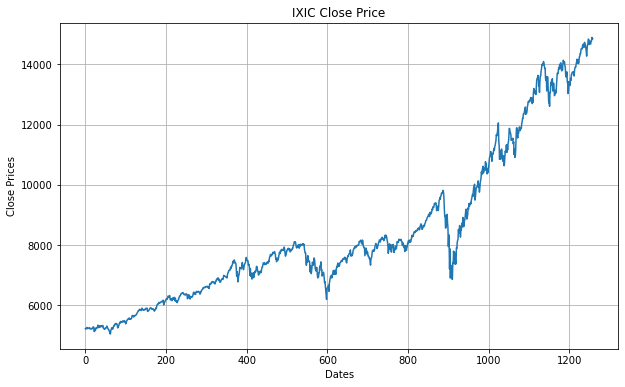

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('IXIC Close Price')
plt.show()

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head(1)

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2016-08-09,5238.540039,5214.950195,5216.209961,5225.47998,1664320000,5225.47998,^IXIC


In [7]:
df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Name'], inplace=True)

In [8]:
cutoff = round(df.shape[0]*0.8)
cutoff

1007

In [9]:
rands = []
for _ in range(1000):
    rands.append(gs(0, 1))
series = pd.Series(rands)

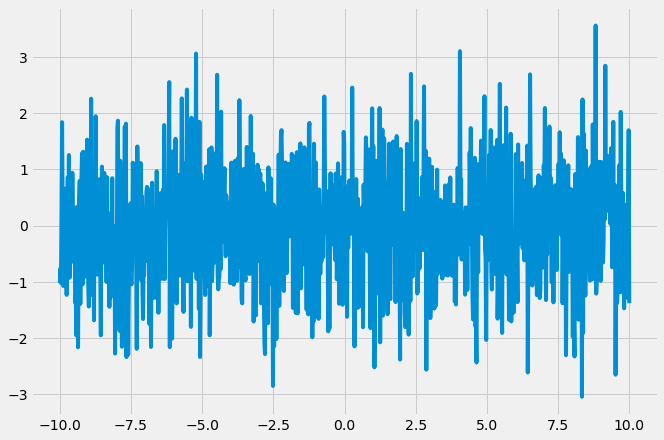

In [10]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 7))

X = np.linspace(-10, 10, 1000)
ax.plot(X, series);

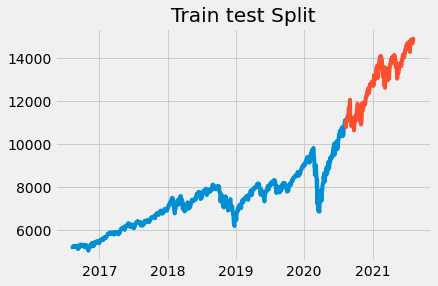

In [11]:
train = df[:cutoff]
test = df[cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

,Close
Date,
2020-08-10,10968.360352
2020-08-11,10782.820312
2020-08-12,11012.240234
2020-08-13,11042.500000
2020-08-14,11019.299805
...,...
2021-08-03,14761.290039
2021-08-04,14780.530273
2021-08-05,14895.120117


In [12]:
random_walk = train.shift(1)
random_walk

,Close
Date,
2016-08-09,NaN
2016-08-10,5225.479980
2016-08-11,5204.580078
2016-08-12,5228.399902
2016-08-15,5232.890137
...,...
2020-08-03,10745.269531
2020-08-04,10902.799805
2020-08-05,10941.169922


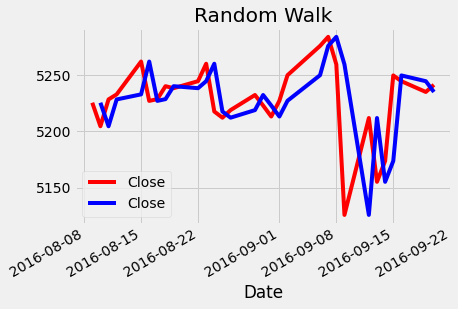

In [13]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
random_walk[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('Random Walk')
ax.legend();

In [14]:
np.sqrt(mean_squared_error(train[1:], random_walk.dropna()))

106.05077953124203

In [15]:
residuals = random_walk[1:] - train[1:]
mse = (residuals**2).sum()/len(residuals-1)
np.sqrt(mse)

Close    106.05078
dtype: float64

In [16]:
random_walk_model = ARIMA(train, order=(0, 1, 0)).fit()
random_walk_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6119.354
Date:                Mon, 09 Aug 2021   AIC                          12240.708
Time:                        10:07:56   BIC                          12245.622
Sample:                             0   HQIC                         12242.575
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.124e+04    171.507     65.511      0.000    1.09e+04    1.16e+04
===================================================================================
Ljung-Box (L1) (Q):                  61.60   Jarque-Bera (JB):             10122.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              16.60   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

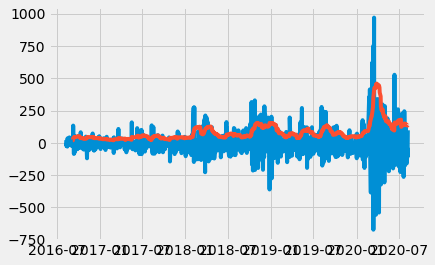

In [17]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(20).std());

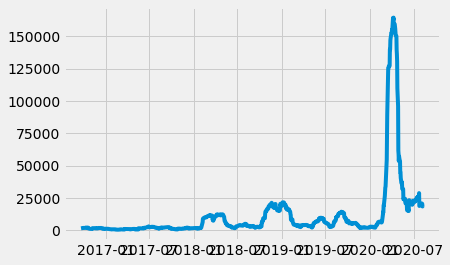

In [18]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

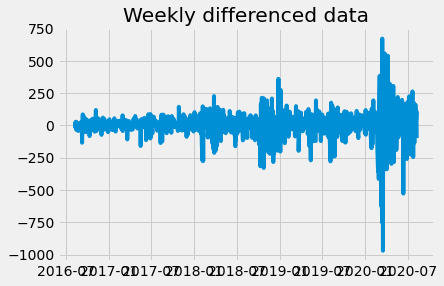

In [19]:
fig, ax = plt.subplots()
ax.plot(train.diff())
ax.set_title('Weekly differenced data');

In [20]:
ma_1 = ARIMA(train, order=(0, 0, 1)).fit()
y_hat = ma_1.predict(typ='levels')
y_hat

Date
2016-08-09    7315.123211
2016-08-10    6270.794057
2016-08-11    6604.872046
2016-08-12    6283.903399
2016-08-15    6475.499611
                 ...     
2020-08-03    8928.627041
2020-08-04    9229.592549
2020-08-05    8974.938633
2020-08-06    9277.390932
2020-08-07    9090.438728
Name: predicted_mean, Length: 1007, dtype: float64

In [21]:
ma_1 = ARIMA(train, order=(0, 1, 1)).fit()

print(random_walk_model.aic)
print(ma_1.aic)

12240.707905045052
12193.556812163684


In [22]:
arma_21 = ARIMA(train, order=(2, 1, 2)).fit()

In [23]:
print(random_walk_model.aic)
print(ma_1.aic)
print(arma_21.aic)

12240.707905045052
12193.556812163684
12172.237353460398


In [24]:
train

,Close
Date,
2016-08-09,5225.479980
2016-08-10,5204.580078
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
...,...
2020-08-03,10902.799805
2020-08-04,10941.169922
2020-08-05,10998.400391


In [25]:
train.resample('B').sum()

,Close
Date,
2016-08-09,5225.479980
2016-08-10,5204.580078
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
...,...
2020-08-03,10902.799805
2020-08-04,10941.169922
2020-08-05,10998.400391


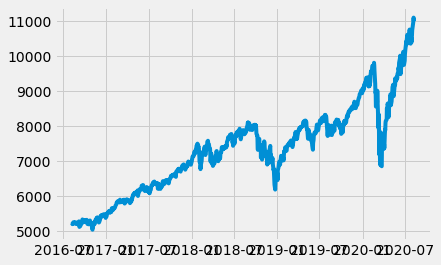

In [44]:
aa_model = ARIMA(train.resample('B').sum(), order=(1, 1, 2), freq='B').fit()
y_hat_train = aa_model.predict(typ='levels')

fig, ax = plt.subplots()
#ax.plot(y_hat_train)
ax.plot(train);

In [34]:
y_hat_train[1:]

Date
2016-08-10     3147.470333
2016-08-11     3937.976692
2016-08-12     4281.291525
2016-08-15     4502.612151
2016-08-16     4627.194041
                  ...     
2020-08-03    10025.197164
2020-08-04    10180.189564
2020-08-05    10119.804326
2020-08-06    10274.623968
2020-08-07    10218.589656
Freq: B, Name: predicted_mean, Length: 1043, dtype: float64

In [35]:
train[1:]

,Close
Date,
2016-08-10,5204.580078
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
...,...
2020-08-03,10902.799805
2020-08-04,10941.169922
2020-08-05,10998.400391


In [41]:
y_hat_train[1:]

Date
2016-08-10     3147.470333
2016-08-11     3937.976692
2016-08-12     4281.291525
2016-08-15     4502.612151
2016-08-16     4627.194041
                  ...     
2020-08-03    10025.197164
2020-08-04    10180.189564
2020-08-05    10119.804326
2020-08-06    10274.623968
2020-08-07    10218.589656
Freq: B, Name: predicted_mean, Length: 1043, dtype: float64

In [40]:
train[1:]

,Close
Date,
2016-08-10,5204.580078
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
...,...
2020-08-03,10902.799805
2020-08-04,10941.169922
2020-08-05,10998.400391


In [36]:
residuals = train[1:] - y_hat_train[1:]
mse = (residuals**2).sum()/len(residuals-1)
np.sqrt(mse)

2016-08-10 00:00:00    0.0
2016-08-11 00:00:00    0.0
2016-08-12 00:00:00    0.0
2016-08-15 00:00:00    0.0
2016-08-16 00:00:00    0.0
                      ... 
2020-08-04 00:00:00    0.0
2020-08-05 00:00:00    0.0
2020-08-06 00:00:00    0.0
2020-08-07 00:00:00    0.0
Close                  0.0
Length: 1044, dtype: float64

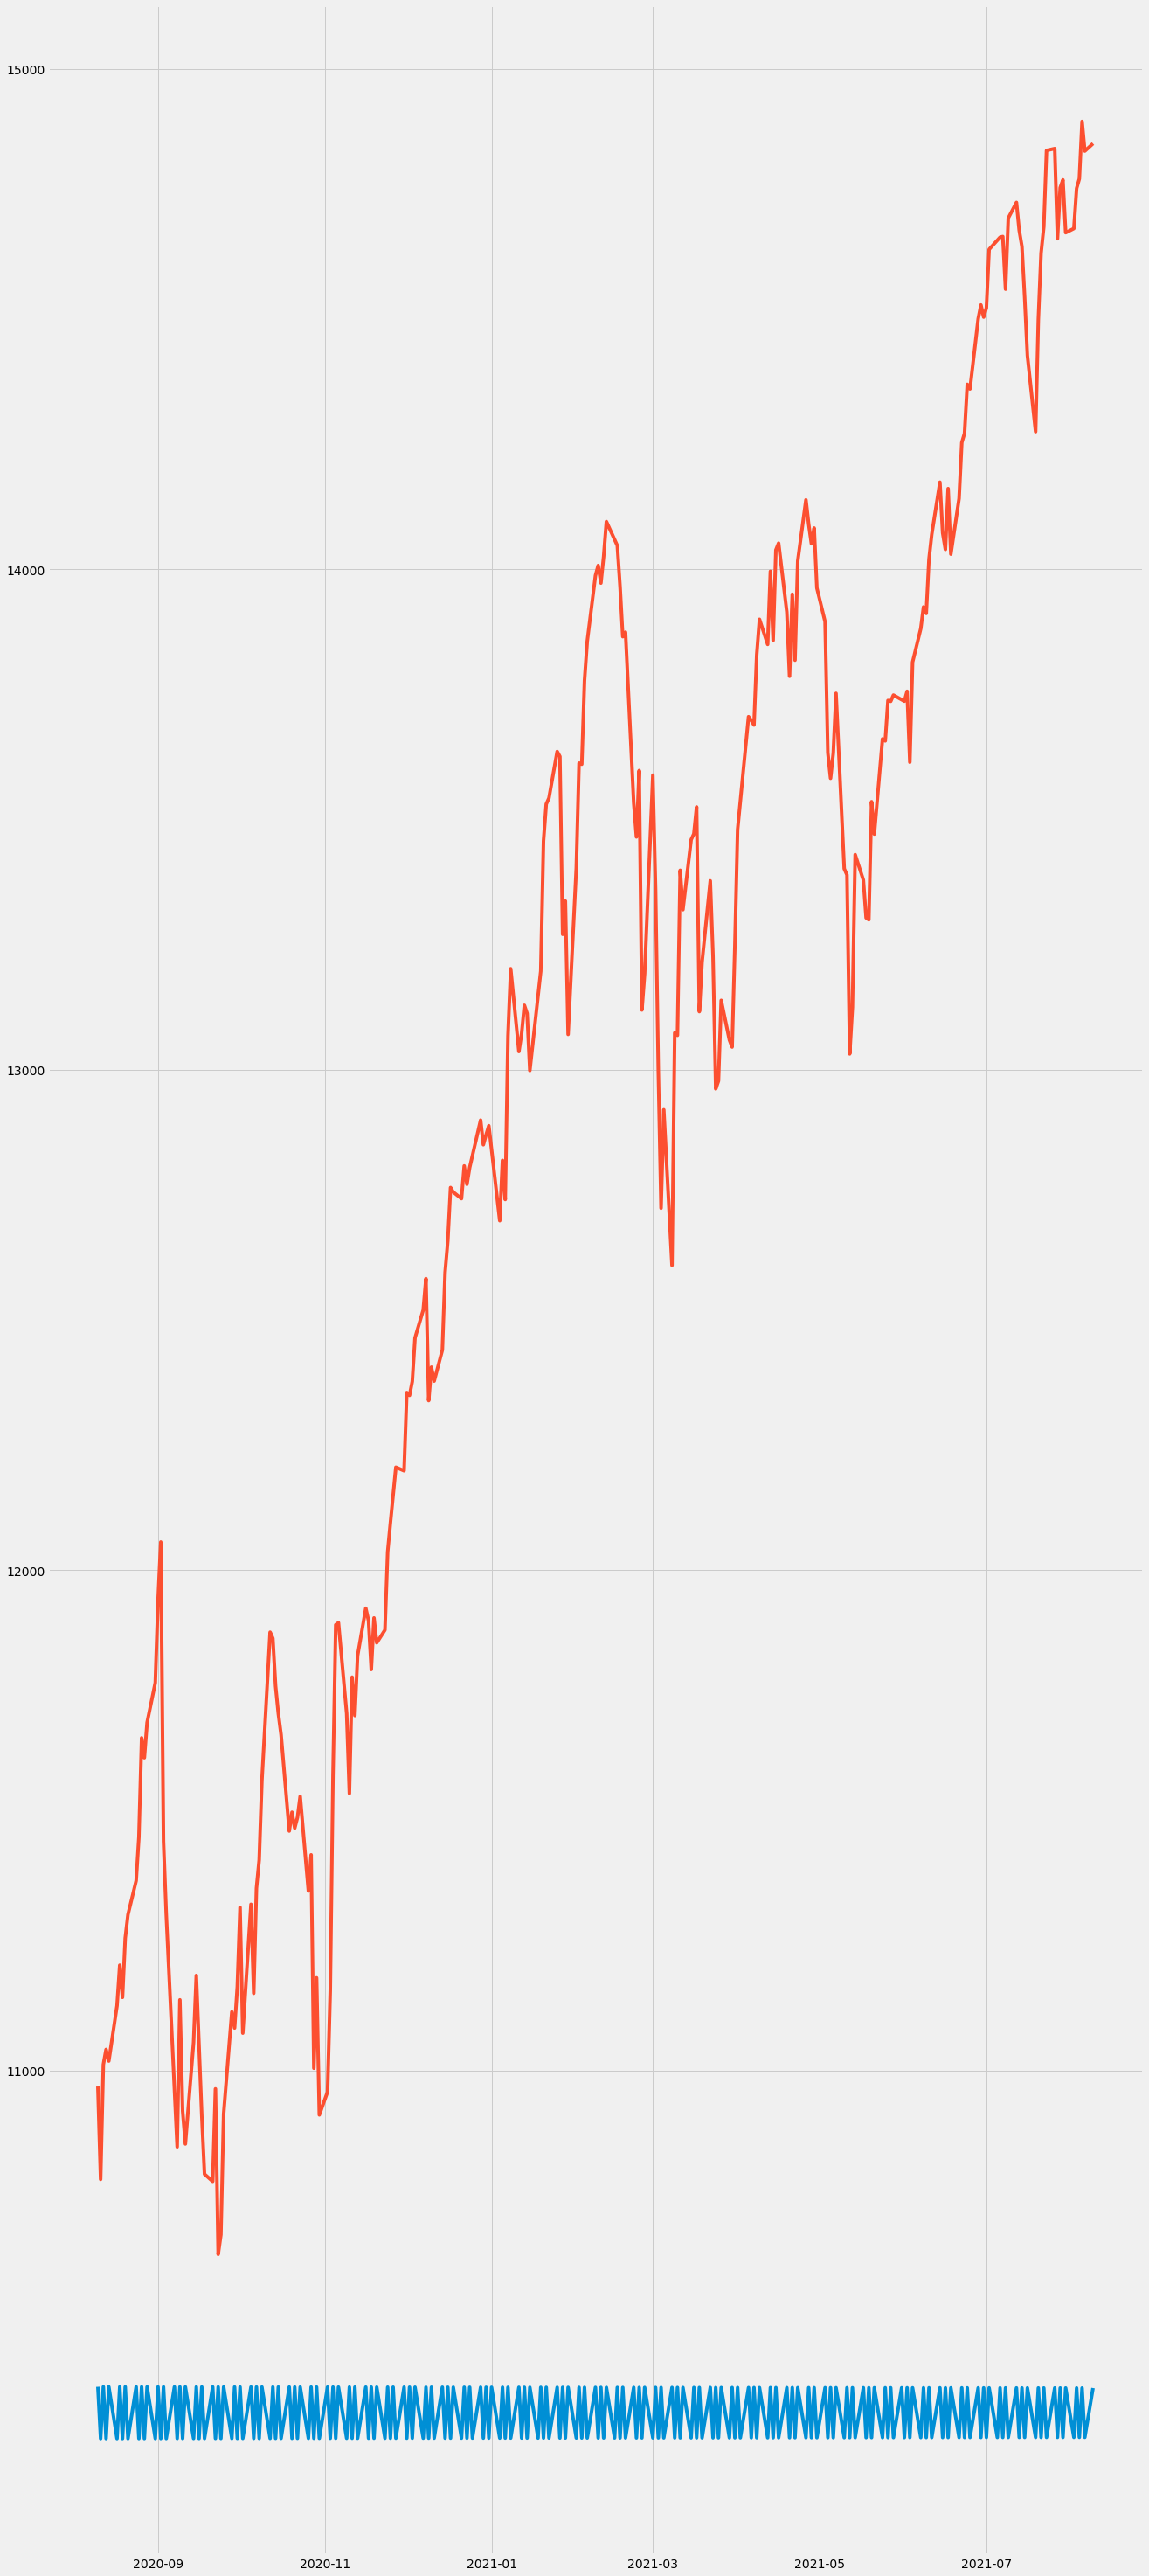

In [28]:
y_hat_test = aa_model.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots(figsize=(20, 50))
ax.plot(y_hat_test)
ax.plot(test);

In [29]:
train.index[-1]

Timestamp('2020-08-07 00:00:00')

In [30]:
train

,Close
Date,
2016-08-09,5225.479980
2016-08-10,5204.580078
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
...,...
2020-08-03,10902.799805
2020-08-04,10941.169922
2020-08-05,10998.400391
